# 2016 US President Election Analysis

In [17]:
# Importing Libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# For Visualization
import matplotlib as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=2)
% matplotlib inline

# Resize the size of plots
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

UsageError: Line magic function `%` not found.


In [18]:
# Import Dataset
poll = pd.read_csv("US Election 2016 Data set.csv")
poll.head()


,Unnamed: 0,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [19]:
# Drop various colums from data as we dont need them
poll = poll.drop(['Pollster URL','Source URL','Partisan','Question Text','Question Iteration'],axis=1)
poll.head()

,Unnamed: 0,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Affiliation
0,0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,None
1,1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,None
2,2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,None
3,3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,None
4,4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,None


In [20]:
# Glimpse of data
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1522 non-null   int64  
 1   Pollster                1522 non-null   object 
 2   Start Date              1522 non-null   object 
 3   End Date                1522 non-null   object 
 4   Entry Date/Time (ET)    1522 non-null   object 
 5   Number of Observations  1013 non-null   float64
 6   Population              1522 non-null   object 
 7   Mode                    1522 non-null   object 
 8   Trump                   1522 non-null   float64
 9   Clinton                 1522 non-null   float64
 10  Other                   1098 non-null   float64
 11  Undecided               1460 non-null   float64
 12  Affiliation             1522 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 154.7+ KB


C:\Users\Rathan Raju\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Rathan Raju\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


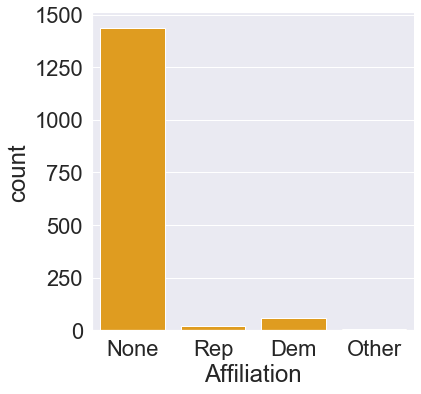

In [21]:
# Quick visualization overview of the affiliation for the polls
sns.factorplot('Affiliation',data=poll,kind='count',legend=True,color='orange',size=6)

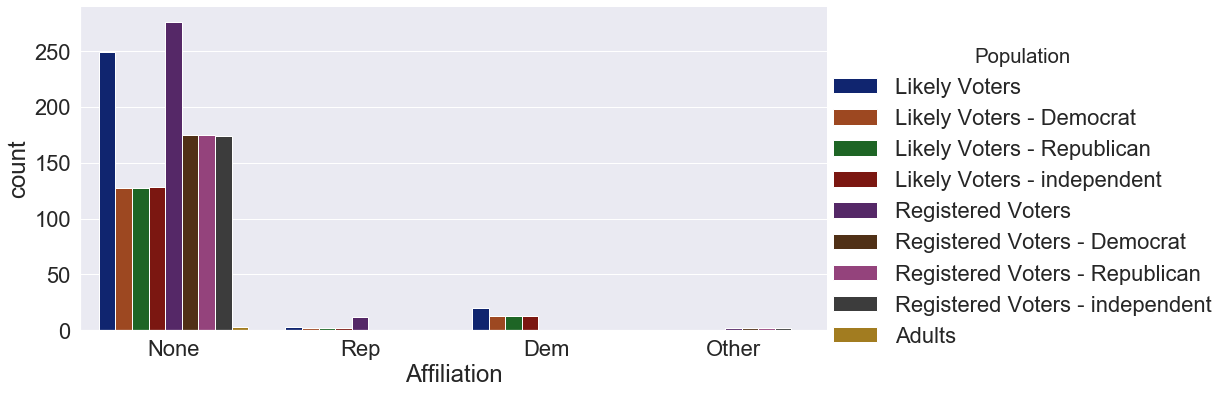

In [22]:
sns.factorplot('Affiliation',data=poll,kind='count',legend=True,hue='Population',size=6,aspect=2,palette='dark')

In [23]:
# Averages of different candidates

average=pd.DataFrame(poll.mean())
average.drop('Number of Observations',inplace=True)
average

,0
Unnamed: 0,760.500000
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [24]:
# Standard Deviation to get the error

std=pd.DataFrame(poll.std())
std.drop('Number of Observations',inplace=True)
std

,0
Unnamed: 0,439.507869
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


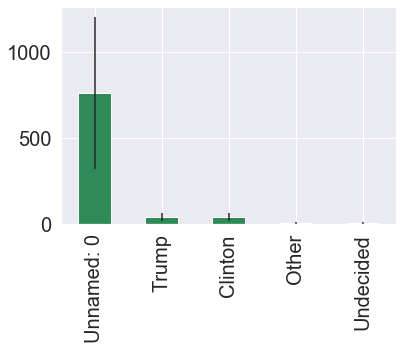

In [25]:
average.plot(yerr=std,kind='bar',legend=False,color='seagreen',fontsize=20)

In [26]:
# Consider undecided factor

poll_avg=pd.concat([average,std],axis=1)
poll_avg.column=['Average','STD']
poll_avg

C:\Users\Rathan Raju\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,0,0
Unnamed: 0,760.500000,439.507869
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


The polls indicate a fairly close race, but what about the undecided voters?

Most of them will likely vote for one of the candidates once the election occurs.

Split the undecided evenly between the two candidates.

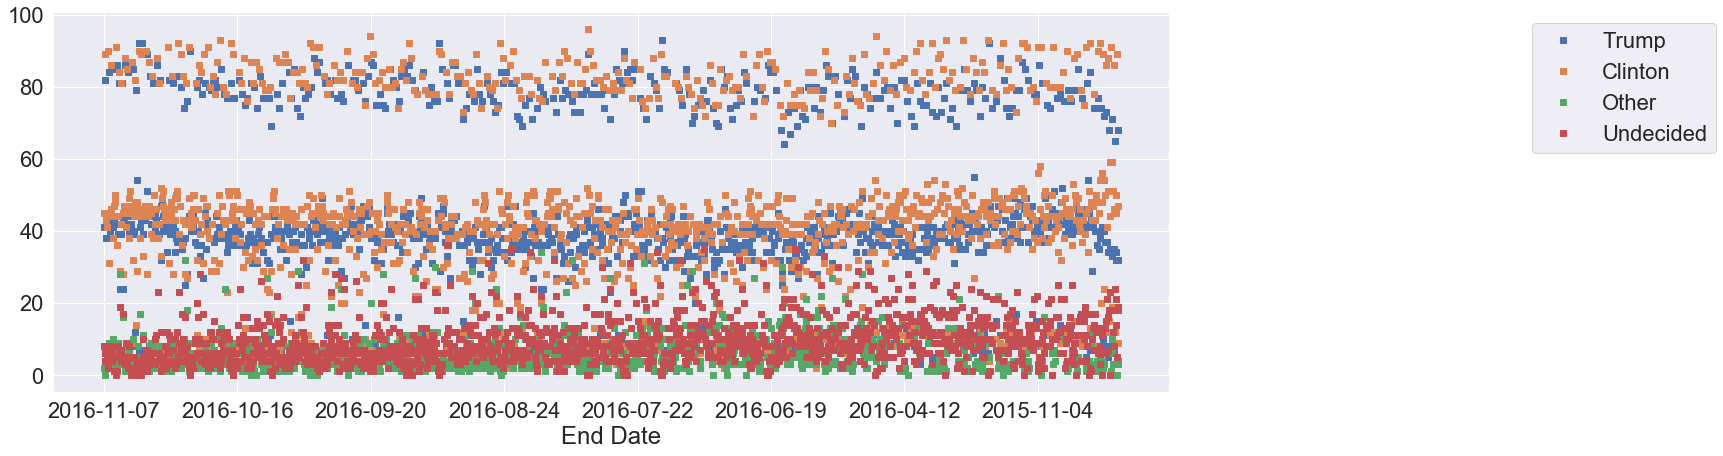

In [27]:
# Time series plot of favour of voters against time
poll.plot(x='End Date',y=['Trump','Clinton','Other','Undecided'],figsize=(20,7),linestyle='',marker='s').legend(bbox_to_anchor=(1.5, 1))

In [28]:
# Plot out the difference between Tump and Clinton and how it changes as time moves along
from datetime import datetime

poll['Difference']=(poll.Trump-poll.Clinton)/100
poll.head()

,Unnamed: 0,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Affiliation,Difference
0,0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,None,-0.04
1,1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,None,-0.83
2,2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,None,0.75
3,3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,None,-0.05
4,4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,None,0.02


In [29]:
# Visualize how this sentiment in difference changes over time

poll=poll.groupby('Start Date',as_index=False).mean()
poll.head()

,Start Date,Unnamed: 0,Number of Observations,Trump,Clinton,Other,Undecided,Difference
0,2015-05-19,1519.5,1046.00,34.25,48.75,2.5,14.00,-0.1450
1,2015-06-20,1515.5,420.75,35.00,47.25,NaN,17.75,-0.1225
2,2015-06-21,1513.0,1005.00,34.00,51.00,3.0,12.00,-0.1700
3,2015-06-26,1510.5,890.00,36.75,57.00,6.0,0.00,-0.2025
4,2015-07-09,1506.5,499.25,35.25,49.50,NaN,16.00,-0.1425


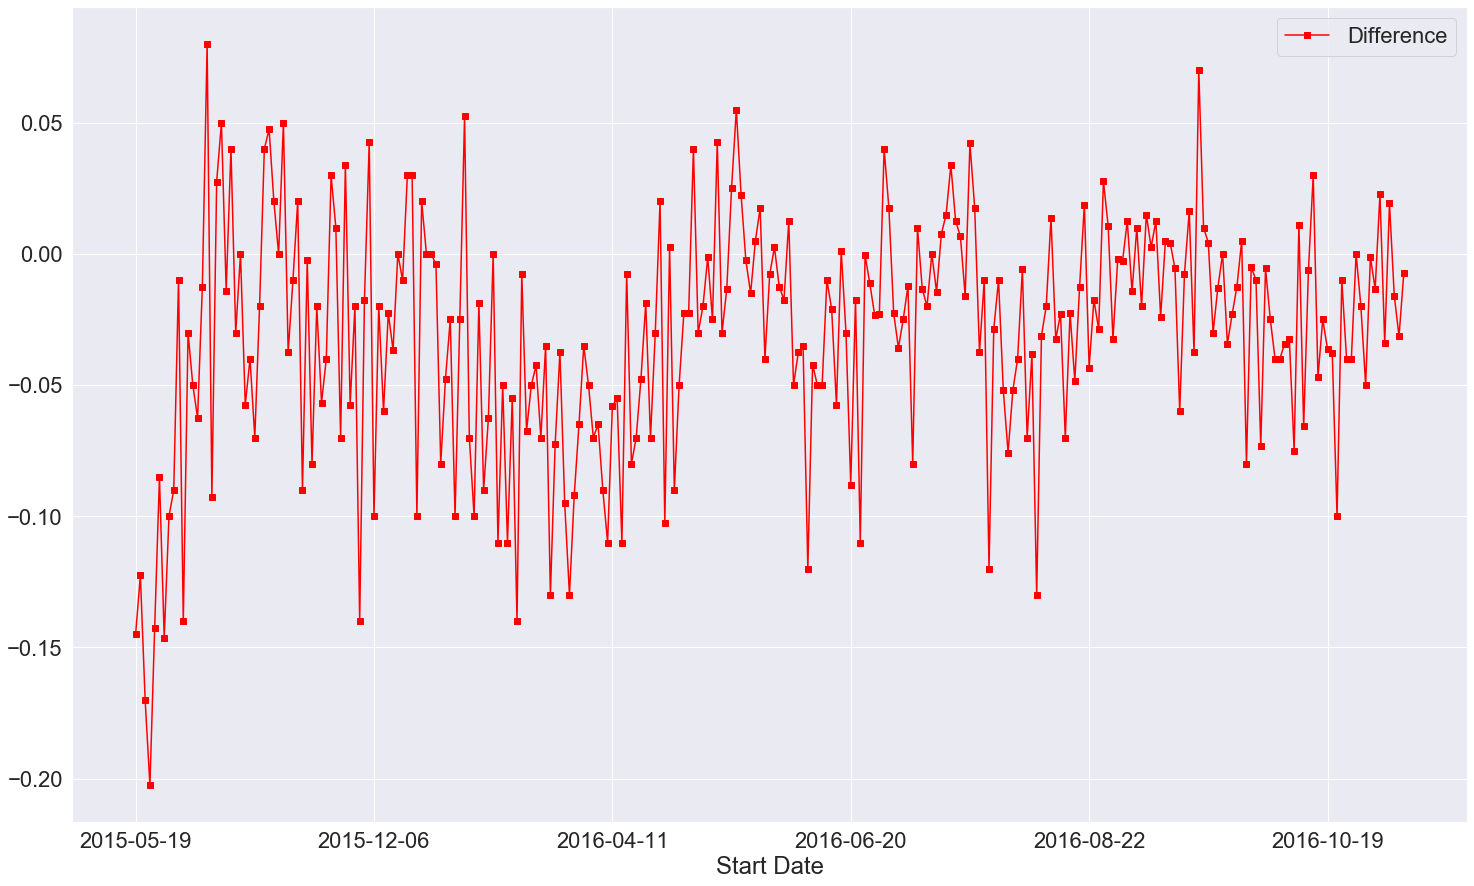

In [30]:
# Plotting the difference in polls between Trump and Clinton
poll.plot('Start Date','Difference',figsize=(25,15),marker='s',color='red')

In [31]:
# Plot marker lines on the dates of the debates and see if there is any general insight to the poll results
# The debate dates were Sept 26th, Oct 9th and Oct 19th 0f 2016

row_in=0
xlimit=[]

for date in poll['Start Date']:
    if date[0:7] == '2016-09':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1
        
print (min(xlimit))

row_in=0
xlimit=[]

for date in poll['Start Date']:
    if date[0:7] == '2016-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1
        
print (max(xlimit))

209
262


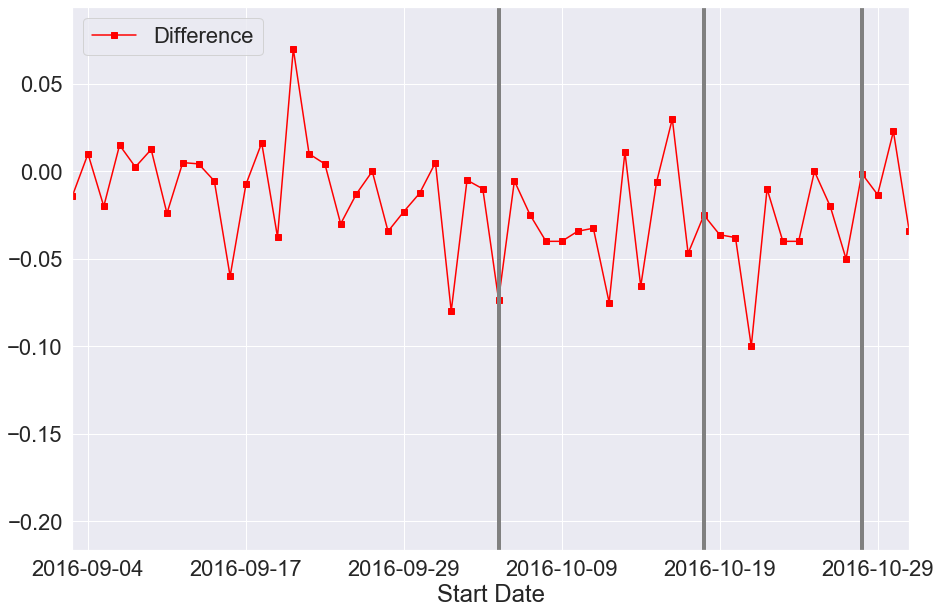

In [32]:
poll.plot('Start Date','Difference',figsize=(15,10),marker='s',color='red',xlim=(209,262))
plt.pyplot.axvline(x=209+27, linewidth=4, color='grey')
plt.pyplot.axvline(x=209+40, linewidth=4, color='grey')
plt.pyplot.axvline(x=209+50, linewidth=4, color='grey')